In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
import re
from collections import defaultdict
from nltk.stem.snowball import SnowballStemmer
import numpy as np
import tensorflow as tf
import os
import numpy as np
import time
%matplotlib inline

snowball = SnowballStemmer('english')

In [49]:
data_path = "~/Documents/Zhou_Yu/DS/Galvanize/Capstone_data/"
data_path_stan = "/Users/zhouyu/Documents/Zhou_Yu/DS/Galvanize/Capstone_data/stanford/file_list.mat"
write_path = "/Users/zhouyu/Documents/Zhou_Yu/DS/Galvanize/Capstone/params/"

### 1. Read in common breed names

In [16]:
# 1. from website
df = pd.read_csv(data_path+"top_dog_breed.csv")

In [17]:
df.head()

,Breed,2016 Rank,2015 Rank,2014 Rank,2013 Rank
0,Retrievers (Labrador),1,1.0,1.0,1.0
1,German Shepherd Dogs,2,2.0,2.0,2.0
2,Retrievers (Golden),3,3.0,3.0,3.0
3,Bulldogs,4,4.0,4.0,5.0
4,Beagles,5,5.0,5.0,4.0


In [18]:
# 2. from the stanford
df_stanford = scipy.io.loadmat("/Users/zhouyu/Documents/Zhou_Yu/DS/Galvanize/Capstone_data/stanford/file_list.mat")

In [19]:
# clean out the breed name
def getBreedName_stanford(file_path):
    df_stanford = scipy.io.loadmat(file_path)
    stanford_breed = set()
    for label in df_stanford['file_list']:
        name = re.findall('\d+-(\S*)\/', label[0][0])
        stanford_breed.add(name[0])
    return stanford_breed

In [20]:
stanford_breed = getBreedName_stanford(data_path_stan)# total 120

In [21]:
stanford_dict = defaultdict(str)
for breed in stanford_breed:
    key = breed.replace('-', ' ').replace('_',' ').lower()
    stanford_dict[key] = breed

In [22]:
stanford_breed_list = set([x.replace('-', ' ').replace('_',' ').lower() for x in stanford_breed])

In [23]:
stanford_breed_list

{u'affenpinscher',
 u'afghan hound',
 u'african hunting dog',
 u'airedale',
 u'american staffordshire terrier',
 u'appenzeller',
 u'australian terrier',
 u'basenji',
 u'basset',
 u'beagle',
 u'bedlington terrier',
 u'bernese mountain dog',
 u'black and tan coonhound',
 u'blenheim spaniel',
 u'bloodhound',
 u'bluetick',
 u'border collie',
 u'border terrier',
 u'borzoi',
 u'boston bull',
 u'bouvier des flandres',
 u'boxer',
 u'brabancon griffon',
 u'briard',
 u'brittany spaniel',
 u'bull mastiff',
 u'cairn',
 u'cardigan',
 u'chesapeake bay retriever',
 u'chihuahua',
 u'chow',
 u'clumber',
 u'cocker spaniel',
 u'collie',
 u'curly coated retriever',
 u'dandie dinmont',
 u'dhole',
 u'dingo',
 u'doberman',
 u'english foxhound',
 u'english setter',
 u'english springer',
 u'entlebucher',
 u'eskimo dog',
 u'flat coated retriever',
 u'french bulldog',
 u'german shepherd',
 u'german short haired pointer',
 u'giant schnauzer',
 u'golden retriever',
 u'gordon setter',
 u'great dane',
 u'great pyren

In [24]:
stanford_dict

defaultdict(str,
            {u'affenpinscher': u'affenpinscher',
             u'afghan hound': u'Afghan_hound',
             u'african hunting dog': u'African_hunting_dog',
             u'airedale': u'Airedale',
             u'american staffordshire terrier': u'American_Staffordshire_terrier',
             u'appenzeller': u'Appenzeller',
             u'australian terrier': u'Australian_terrier',
             u'basenji': u'basenji',
             u'basset': u'basset',
             u'beagle': u'beagle',
             u'bedlington terrier': u'Bedlington_terrier',
             u'bernese mountain dog': u'Bernese_mountain_dog',
             u'black and tan coonhound': u'black-and-tan_coonhound',
             u'blenheim spaniel': u'Blenheim_spaniel',
             u'bloodhound': u'bloodhound',
             u'bluetick': u'bluetick',
             u'border collie': u'Border_collie',
             u'border terrier': u'Border_terrier',
             u'borzoi': u'borzoi',
             u'boston bull': u

In [25]:
#2.1. Naturally there is no intersection....
stanford_breed_list & set(df['Breed'].str.lower().values)

{u'great pyrenees', u'shih tzu'}

In [26]:
'bulldog' in stanford_breed_list

False

In [27]:
# from ox database 
df_ox = pd.read_csv(data_path+"ox/ox_annotations/list.txt",skiprows=6,delimiter=" ", names=["image_ID", "class","species", "breed"])

In [28]:
df_ox_dogs = df_ox[df_ox['species']==2]
df_ox_dogs.head()

,image_ID,class,species,breed
50,american_bulldog_100,2,2,1
51,american_bulldog_101,2,2,1
52,american_bulldog_102,2,2,1
53,american_bulldog_103,2,2,1
54,american_bulldog_104,2,2,1


In [29]:
df_ox_dogs.shape

(4978, 4)

In [30]:
def remove_digit(s):
    temp = ''.join([x if not x.isdigit() else '' for x in s])
    return temp.replace('_', ' ').strip()
df_ox_dogs['breedname'] = df_ox_dogs['image_ID'].apply(lambda row:remove_digit(row))

/Users/zhouyu/Documents/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [31]:
df_ox_dogs['breedname'].head()

50    american bulldog
51    american bulldog
52    american bulldog
53    american bulldog
54    american bulldog
Name: breedname, dtype: object

In [32]:
df_ox_dogs['breedname'].value_counts()

miniature pinscher            200
german shorthaired            200
chihuahua                     200
beagle                        200
great pyrenees                200
american bulldog              200
samoyed                       200
pomeranian                    200
pug                           200
leonberger                    200
havanese                      200
yorkshire terrier             200
japanese chin                 200
american pit bull terrier     200
english setter                200
basset hound                  200
shiba inu                     200
wheaten terrier               200
saint bernard                 200
keeshond                      199
scottish terrier              199
boxer                         199
english cocker spaniel        196
newfoundland                  196
staffordshire bull terrier    189
Name: breedname, dtype: int64

In [33]:
ox_breed_list = set(df_ox_dogs['breedname'].values)

In [34]:
ox_dict = defaultdict(str)
for breed in ox_breed_list:
    ox_dict[breed] = breed.replace(' ', '_')

In [35]:
list_intersect = ox_breed_list & stanford_breed_list

In [36]:
ox_breed_list - list_intersect

{'american bulldog',
 'american pit bull terrier',
 'basset hound',
 'english cocker spaniel',
 'german shorthaired',
 'havanese',
 'japanese chin',
 'leonberger',
 'scottish terrier',
 'shiba inu',
 'staffordshire bull terrier',
 'wheaten terrier'}

In [38]:
ox_dict

defaultdict(str,
            {'american bulldog': 'american_bulldog',
             'american pit bull terrier': 'american_pit_bull_terrier',
             'basset hound': 'basset_hound',
             'beagle': 'beagle',
             'boxer': 'boxer',
             'chihuahua': 'chihuahua',
             'english cocker spaniel': 'english_cocker_spaniel',
             'english setter': 'english_setter',
             'german shorthaired': 'german_shorthaired',
             'great pyrenees': 'great_pyrenees',
             'havanese': 'havanese',
             'japanese chin': 'japanese_chin',
             'keeshond': 'keeshond',
             'leonberger': 'leonberger',
             'miniature pinscher': 'miniature_pinscher',
             'newfoundland': 'newfoundland',
             'pomeranian': 'pomeranian',
             'pug': 'pug',
             'saint bernard': 'saint_bernard',
             'samoyed': 'samoyed',
             'scottish terrier': 'scottish_terrier',
             'shiba inu'

In [37]:
stanford_breed_list - list_intersect

{u'affenpinscher',
 u'afghan hound',
 u'african hunting dog',
 u'airedale',
 u'american staffordshire terrier',
 u'appenzeller',
 u'australian terrier',
 u'basenji',
 u'basset',
 u'bedlington terrier',
 u'bernese mountain dog',
 u'black and tan coonhound',
 u'blenheim spaniel',
 u'bloodhound',
 u'bluetick',
 u'border collie',
 u'border terrier',
 u'borzoi',
 u'boston bull',
 u'bouvier des flandres',
 u'brabancon griffon',
 u'briard',
 u'brittany spaniel',
 u'bull mastiff',
 u'cairn',
 u'cardigan',
 u'chesapeake bay retriever',
 u'chow',
 u'clumber',
 u'cocker spaniel',
 u'collie',
 u'curly coated retriever',
 u'dandie dinmont',
 u'dhole',
 u'dingo',
 u'doberman',
 u'english foxhound',
 u'english springer',
 u'entlebucher',
 u'eskimo dog',
 u'flat coated retriever',
 u'french bulldog',
 u'german shepherd',
 u'german short haired pointer',
 u'giant schnauzer',
 u'golden retriever',
 u'gordon setter',
 u'great dane',
 u'greater swiss mountain dog',
 u'groenendael',
 u'ibizan hound',
 u'ir

### 2. Condense to a breed list

In [39]:
top100 = df['Breed'].str.lower().values[:100]

In [40]:
def clean_top100(lst):
    res = [word.replace('(','') for word in lst]
    res = [word.replace(')','') for word in res]
    res = [re.sub(r'[^\x00-\x7F]+',' ', word) for word in res]
    return res

In [41]:
top100 = clean_top100(top100)
top100[:10]

['retrievers labrador',
 'german shepherd dogs',
 'retrievers golden',
 'bulldogs',
 'beagles',
 'french bulldogs',
 'poodles',
 'rottweilers',
 'yorkshire terriers',
 'boxers']

In [42]:
# get popular score
def get_top_position(word, top100):
    score = np.array([breed_dist(word, topb) for topb in top100])
    top_ind = np.argmax(score)
    return (top100[top_ind], score[top_ind], top_ind)
def breed_dist(b1, b2):
    br1 = snowball.stem(b1).strip().split()
    br2 = snowball.stem(b2).strip().split()
    return len(set(br1)&set(br2))*1.0/len(set(br1)|set(br2))

In [51]:
count = 0 
ox_image_list = set()
fname = write_path+'ox_breeds.txt'
    
with open(fname, 'w') as f:
    for ox_breed in ox_breed_list:
        _, score, rank = get_top_position(ox_breed,top100)
        if rank < 70 and score >0.4:
            print ox_breed, get_top_position(ox_breed, top100)
            ox_image_list.add(ox_breed)
            count += 1
            f.writeline(ox_dict[ox_breed])
print "total top breed in oxford database only", count

yorkshire terrier ('yorkshire terriers', 1.0, 8)


AttributeError: 'file' object has no attribute 'writeline'

In [27]:
stan_only_breed = stanford_breed_list - ox_breed_list
stan_image_list = set()
count = 0 
for stan_breed in stan_only_breed:
    _, score, rank = get_top_position(stan_breed,top100)
    if rank < 70 and score >0.4:
        print stan_breed, get_top_position(stan_breed, top100)
        stan_image_list.add(stan_breed)
        count += 1
print "total top breed in stanford database only", count

rottweiler ('rottweilers', 1.0, 7)
bull mastiff ('mastiffs', 0.5, 27)
standard poodle ('poodles', 0.5, 6)
papillon ('papillons', 1.0, 52)
weimaraner ('weimaraners', 1.0, 33)
basset ('basset hounds', 0.5, 38)
border collie ('border collies', 1.0, 37)
toy poodle ('poodles', 0.5, 6)
malamute ('alaskan malamutes', 0.5, 58)
french bulldog ('french bulldogs', 1.0, 5)
shetland sheepdog ('shetland sheepdogs', 1.0, 23)
cairn ('cairn terriers', 0.5, 69)
whippet ('whippets', 1.0, 59)
malinois ('belgian malinois', 0.5, 46)
bernese mountain dog ('bernese mountain dogs', 1.0, 26)
bloodhound ('bloodhounds', 1.0, 51)
miniature poodle ('poodles', 0.5, 6)
shih tzu ('shih tzu', 1.0, 19)
rhodesian ridgeback ('rhodesian ridgebacks', 1.0, 41)
west highland white terrier ('west highland white terriers', 1.0, 40)
siberian husky ('siberian huskies', 1.0, 11)
great dane ('great danes', 1.0, 13)
collie ('collies', 1.0, 36)
doberman ('doberman pinschers', 0.5, 14)
chesapeake bay retriever ('retrievers chesapeake 

### 3. Retrive pictures for  a breed

In [28]:
ox_img_path = '/Users/zhouyu/Documents/Zhou_Yu/DS/Galvanize/Capstone_data/ox/ox_images/'

In [29]:
ox_file_names = os.listdir(ox_img_path)

In [30]:
def find_ox_file_name(ox_breed, ox_file_names):
    file_list = []
    for fi in ox_file_names:
        temp = remove_digit(fi.lower()).strip('.jpg').strip()
        if temp == ox_breed and fi.endswith('.jpg'):
            file_list.append(fi)
    return file_list

In [31]:
ox_list = list(ox_image_list)
test = find_ox_file_name(ox_list[11], ox_file_names)
test_subset = [ox_img_path+x for x in test[:4]]

In [32]:
print test_subset

['/Users/zhouyu/Documents/Zhou_Yu/DS/Galvanize/Capstone_data/ox/ox_images/miniature_pinscher_1.jpg', '/Users/zhouyu/Documents/Zhou_Yu/DS/Galvanize/Capstone_data/ox/ox_images/miniature_pinscher_10.jpg', '/Users/zhouyu/Documents/Zhou_Yu/DS/Galvanize/Capstone_data/ox/ox_images/miniature_pinscher_100.jpg', '/Users/zhouyu/Documents/Zhou_Yu/DS/Galvanize/Capstone_data/ox/ox_images/miniature_pinscher_101.jpg']


In [6]:
# use tensorflow to load and process pictures
test_subset = ['/Users/zhouyu/Documents/Zhou_Yu/DS/Galvanize/Capstone_data/ox/ox_images/miniature_pinscher_1.jpg', 
               '/Users/zhouyu/Documents/Zhou_Yu/DS/Galvanize/Capstone_data/ox/ox_images/miniature_pinscher_10.jpg', 
               '/Users/zhouyu/Documents/Zhou_Yu/DS/Galvanize/Capstone_data/ox/ox_images/miniature_pinscher_100.jpg', 
               '/Users/zhouyu/Documents/Zhou_Yu/DS/Galvanize/Capstone_data/ox/ox_images/miniature_pinscher_101.jpg']

In [9]:
# test code from https://stackoverflow.com/questions/33648322/tensorflow-image-reading-display
# read single random image
one_file_queue = tf.train.string_input_producer(test_subset[:4])
reader = tf.WholeFileReader()
key, value = reader.read(one_file_queue)

my_img = tf.image.decode_jpeg(value) # use png or jpg decoder based on your files.
resized = tf.image.resize_images(my_img,[300,300],method=1)
init_op = tf.global_variables_initializer()
proc_images_to_show = []
ori_images_to_show = []
with tf.Session() as sess:
    sess.run(init_op)

    # Start populating the filename queue.

    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)
    for i in range(4): #length of your filename lis
        ori_images_to_show.append(my_img.eval())
        #image = resized.eval() #here is your image Tensor :) 
        proc_images_to_show.append(resized.eval())
    coord.request_stop()
    coord.join(threads)

(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(375, 500, 3)
(375, 500, 3)
(375, 500, 3)
(492, 500, 3)


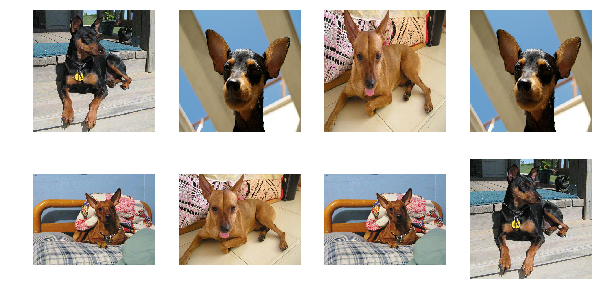

In [10]:
fig, axes = plt.subplots(2,4, figsize=(10,5))
for img, ax in zip(proc_images_to_show, axes[0].flatten()):
    print img.shape
    ax.imshow(img)
    ax.axis('off')
for img, ax in zip(ori_images_to_show, axes[1].flatten()):
    print img.shape
    ax.imshow(img)
    ax.axis('off')
plt.show()

In [19]:
# try another code from to batch readin https://zhuanlan.zhihu.com/p/27481108
def read_img(filenames, num_epochs, shuffle=True):
    filename_queue = tf.train.string_input_producer(filenames,    
                              num_epochs=num_epochs, shuffle=True)

    reader = tf.WholeFileReader()
    key, value = reader.read(filename_queue)
    img = tf.image.decode_jpeg(value, channels=3)
    shape = tf.shape(img)
    height = shape[0]
    width = shape[1]
    long_edge = tf.maximum(height, width)
    img_padded = tf.image.resize_image_with_crop_or_pad(img, long_edge, long_edge)
    img = tf.image.resize_images(img_padded, size=(256, 256),
                   method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

    return img

In [20]:
#create_tfrecord_start_time = time.time()
#convert_to_tfrecord()
#create_tfrecord_duration = time.time() - create_tfrecord_start_time
#print("Create TFrecord Duration:  %.3f" % (create_tfrecord_duration))

with tf.Session() as sess:
    min_after_dequeue = 1000
    capacity = min_after_dequeue + 3*4

    img = read_img(test_subset, 1, True)
    # img = read_tfrecord("training.tfrecords", 1, True)
    img_batch = tf.train.shuffle_batch([img], batch_size=4,   
                                       num_threads=8,
                                       capacity=capacity,
                                   min_after_dequeue=min_after_dequeue)


    init = (tf.global_variables_initializer(),          
            tf.local_variables_initializer())
    sess.run(init)

    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)
    i = 0
    read_tfrecord_start_time = time.time()
    try:
        while not coord.should_stop():
            imgs = sess.run([img_batch])
            for img in imgs:
                print(img.shape)
    except Exception, e:
        coord.request_stop(e)
    finally:
        coord.request_stop()
    coord.join(threads)
    read_tfrecord_duration = time.time() - read_tfrecord_start_time
    print("Read TFrecord Duration:   %.3f" % read_tfrecord_duration)

(4, 256, 256, 3)
Read TFrecord Duration:   0.252


(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


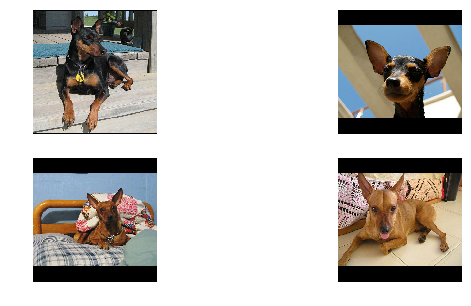

In [21]:
fig, axes = plt.subplots(2,2, figsize=(10,5))
for im, ax in zip(img, axes.flatten()):
    print im.shape
    ax.imshow(im)
    ax.axis('off')
plt.show()